In [260]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split ,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Objective-The goal is to predict next day maximum minium airtemprature forecast

In [261]:
#read csv file and ovierview of data
temp=pd.read_csv(r"C:\Users\INPshy\Desktop\DATA Science\temperature.csv")
temp.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [262]:
#Setting option to show max rows and max columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)
temp.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [263]:
#shape of dataset
temp.shape

(7752, 25)

In [264]:
#check unique value count present in dataset  
temp.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

In [265]:
temp.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

lots of null values in many column  target variable Next_Tmax, and Next_Tmin also missing values 

In [266]:
print(temp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


Date is only object rest are float data ,

In [267]:
#Describe method
temp.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


DEM, Solar radiation , standard deveation are highest varaince in data distribution ,many values missing as count is not equal in dataset.

In [268]:
#filling NaN values
temp['station']=temp['station'].fillna(temp['station'].mode()[0])
temp['Date']=temp['Date'].fillna(temp['Date'].mode()[0])
temp['Present_Tmax']=temp['Present_Tmax'].fillna(temp['Present_Tmax'].mean())
temp['Present_Tmin']=temp['Present_Tmin'].fillna(temp['Present_Tmin'].mean())
temp['LDAPS_RHmin']=temp['LDAPS_RHmin'].fillna(temp['LDAPS_RHmin'].mean())
temp['LDAPS_RHmax']=temp['LDAPS_RHmax'].fillna(temp['LDAPS_RHmax'].mean())
temp['LDAPS_Tmax_lapse']=temp['LDAPS_Tmax_lapse'].fillna(temp['LDAPS_Tmax_lapse'].mean())
temp['LDAPS_Tmin_lapse']=temp['LDAPS_Tmin_lapse'].fillna(temp['LDAPS_Tmin_lapse'].mean())
temp['LDAPS_WS']=temp['LDAPS_WS'].fillna(temp['LDAPS_WS'].mean())
temp['LDAPS_LH']=temp['LDAPS_LH'].fillna(temp['LDAPS_LH'].mean())
temp['LDAPS_CC1']=temp['LDAPS_CC1'].fillna(temp['LDAPS_CC1'].mean())
temp['LDAPS_CC2']=temp['LDAPS_CC2'].fillna(temp['LDAPS_CC2'].mean())
temp['LDAPS_CC3']=temp['LDAPS_CC3'].fillna(temp['LDAPS_CC3'].mean())
temp['LDAPS_CC4']=temp['LDAPS_CC4'].fillna(temp['LDAPS_CC4'].mean())
temp['LDAPS_PPT1']=temp['LDAPS_PPT1'].fillna(temp['LDAPS_PPT1'].mean())
temp['LDAPS_PPT2']=temp['LDAPS_PPT2'].fillna(temp['LDAPS_PPT2'].mean())
temp['LDAPS_PPT3']=temp['LDAPS_PPT3'].fillna(temp['LDAPS_PPT3'].mean())
temp['LDAPS_PPT4']=temp['LDAPS_PPT4'].fillna(temp['LDAPS_PPT4'].mean())
temp['Next_Tmax']=temp['Next_Tmax'].fillna(temp['Next_Tmax'].mean())
temp['Next_Tmin']=temp['Next_Tmin'].fillna(temp['Next_Tmin'].mean())

In [269]:
#recheck null values
temp.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Now no null values in dataset

In [270]:
#encode object column Date
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [271]:
for i in temp.columns:
    if temp[i].dtype=="object":
        temp[i]=label.fit_transform(temp[i])

In [272]:
temp.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,290,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,290,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,290,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,290,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,290,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


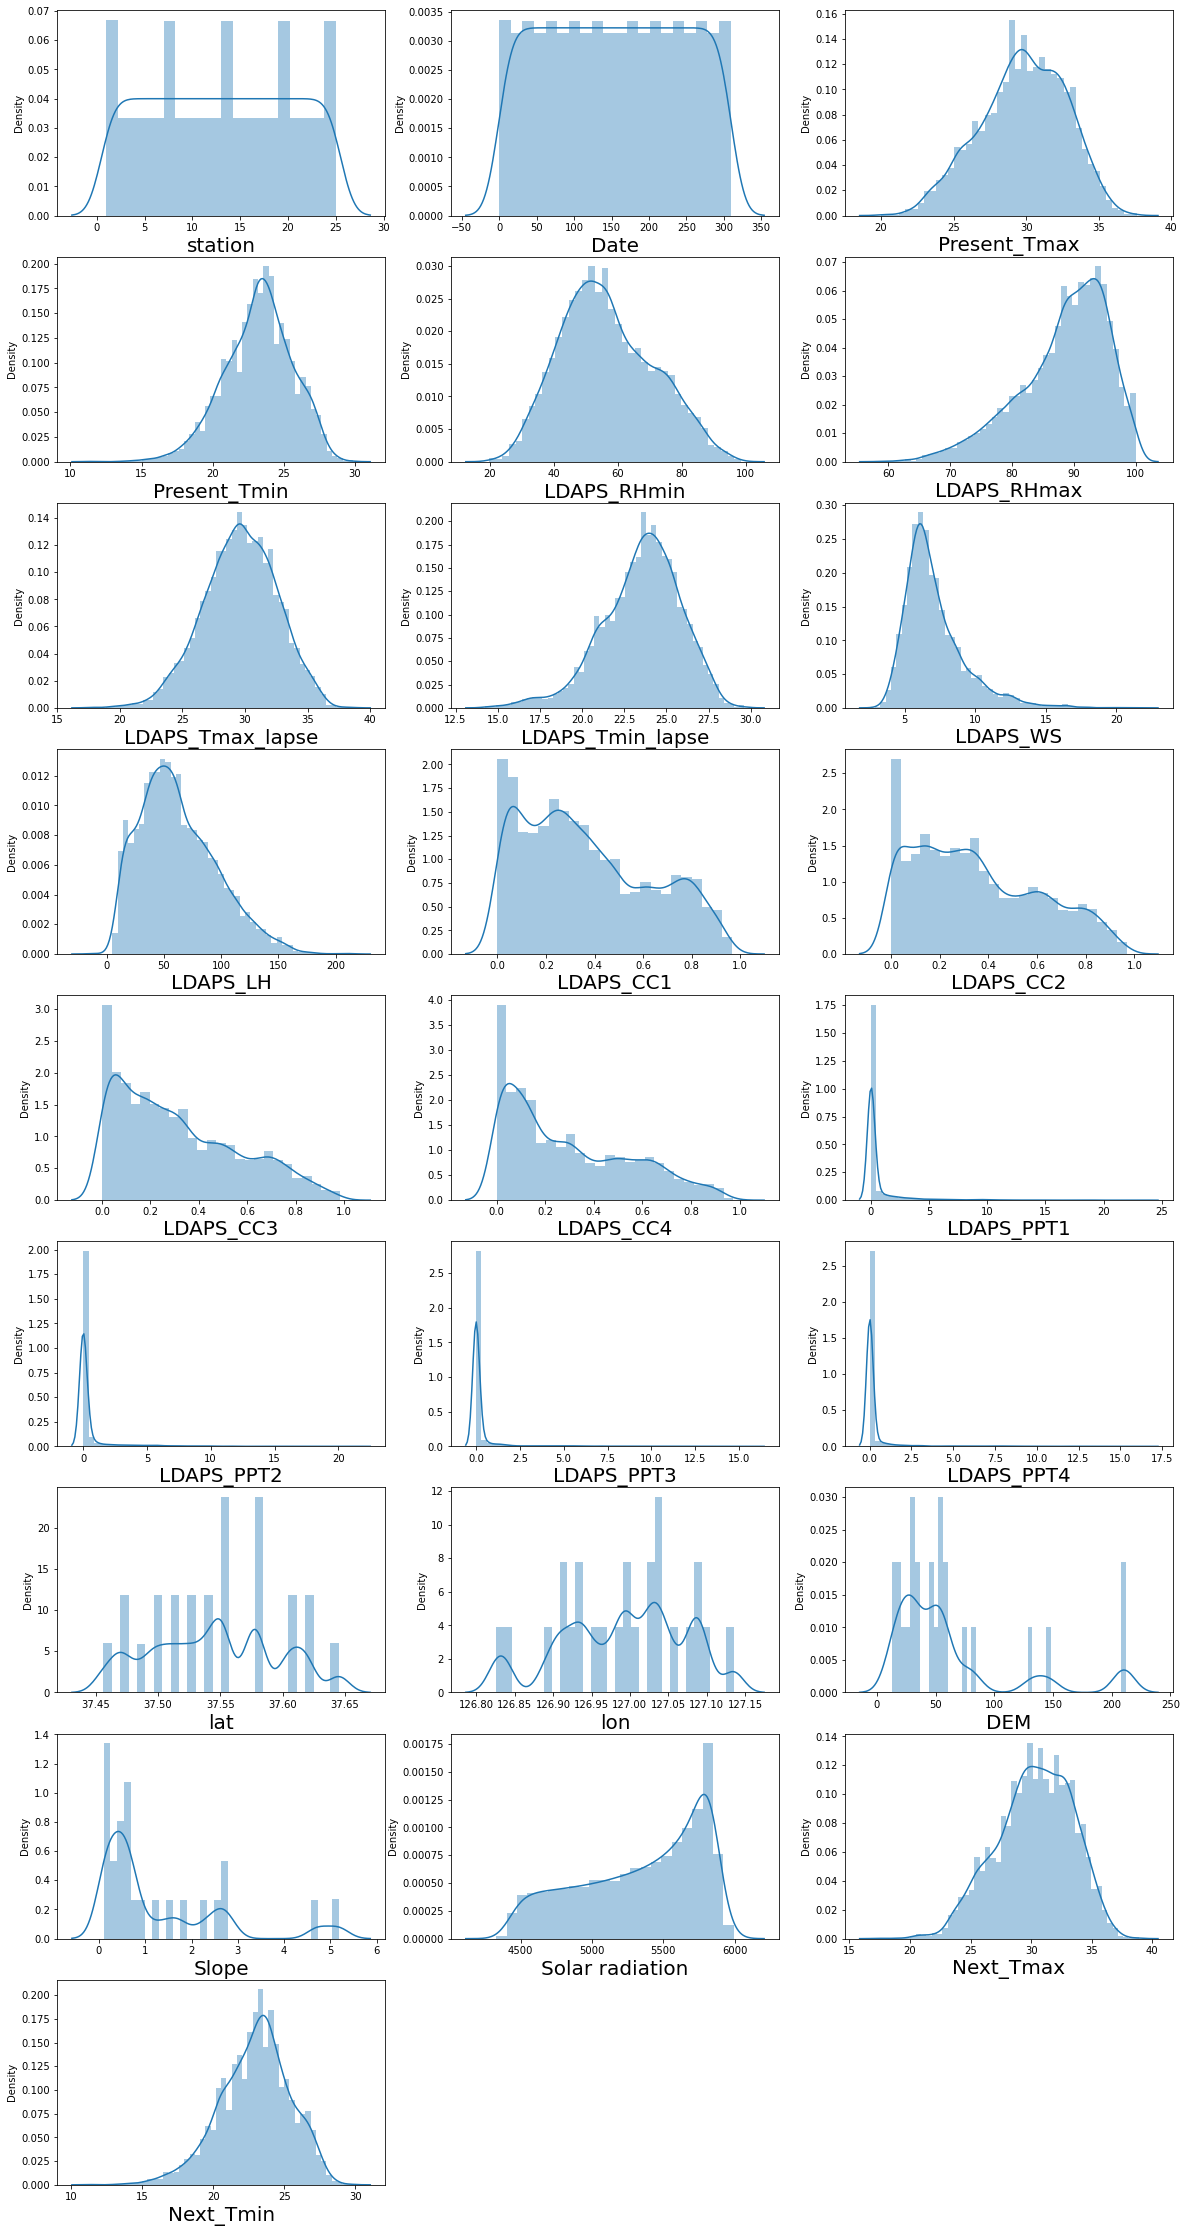

In [273]:
#lets plot data distribution 
plt.figure(figsize=(20,40))
plotnumber=1
for column in temp:
    if plotnumber<=25:
        ax=plt.subplot(9,3,plotnumber)
        sns.distplot(temp[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()  

37.5776    1240
37.5507    1240
37.5237     620
37.4697     620
37.5102     620
37.6181     620
37.4967     620
37.6046     620
37.5372     620
37.6450     311
37.4562     311
37.4832     310
Name: lat, dtype: int64

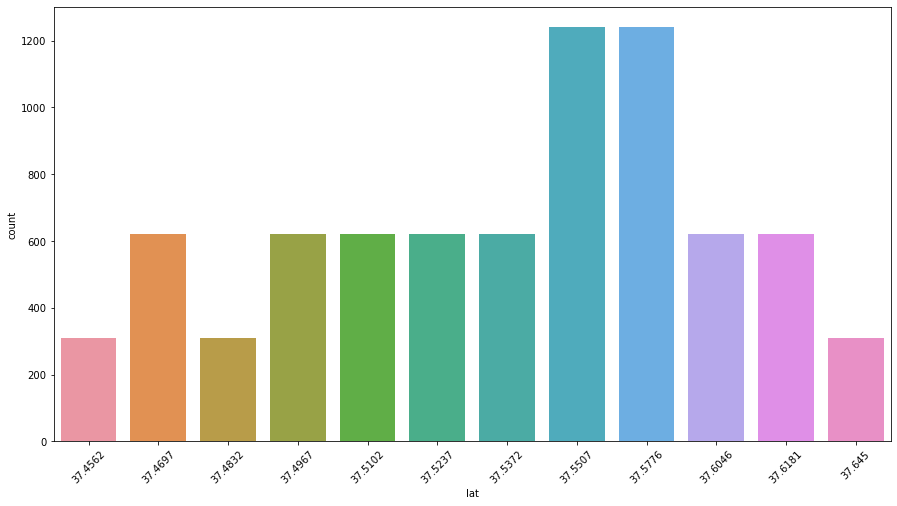

In [274]:
#lat count which value repeated 
plt.figure(figsize=(15,8))
sns.countplot(x='lat',data=temp)
plt.xticks(rotation=45)
temp['lat'].value_counts()

127.135    311
126.826    311
126.995    310
126.937    310
126.991    310
126.988    310
127.024    310
127.086    310
127.022    310
126.970    310
126.838    310
127.042    310
127.058    310
127.040    310
126.891    310
127.032    310
127.099    310
127.083    310
126.938    310
126.909    310
126.910    310
127.004    310
126.927    310
126.955    310
127.085    310
Name: lon, dtype: int64

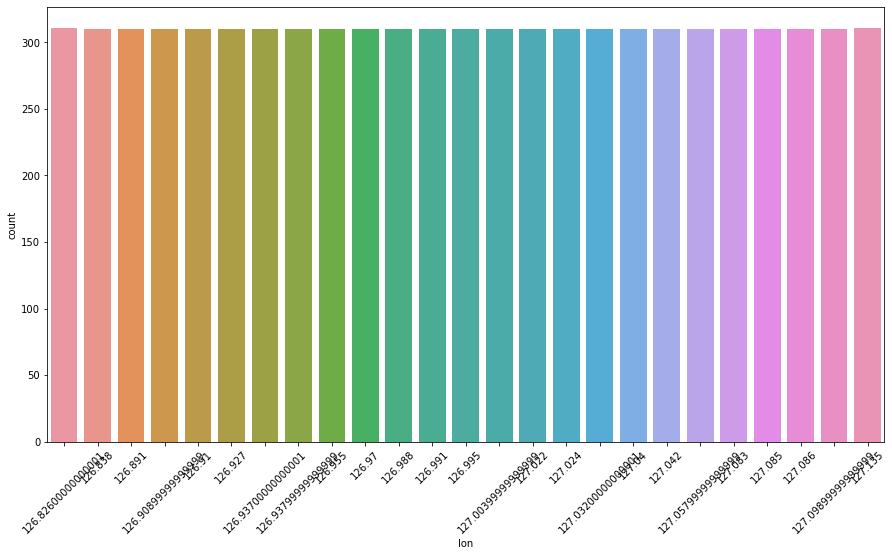

In [275]:
#lon count which value repeated 
plt.figure(figsize=(15,8))
sns.countplot(x='lon',data=temp)
plt.xticks(rotation=45)
temp['lon'].value_counts()

 127.135    126.826  both are 311 count rest value  300 count 

12.3700     311
212.3350    311
146.5540    310
82.2912     310
54.6384     310
35.0380     310
17.2956     310
52.5180     310
75.0924     310
15.5876     310
132.1180    310
56.4448     310
21.9668     310
26.2980     310
28.7000     310
33.3068     310
59.8324     310
53.4712     310
50.9312     310
208.5070    310
19.5844     310
30.9680     310
44.7624     310
30.0464     310
45.7160     310
Name: DEM, dtype: int64

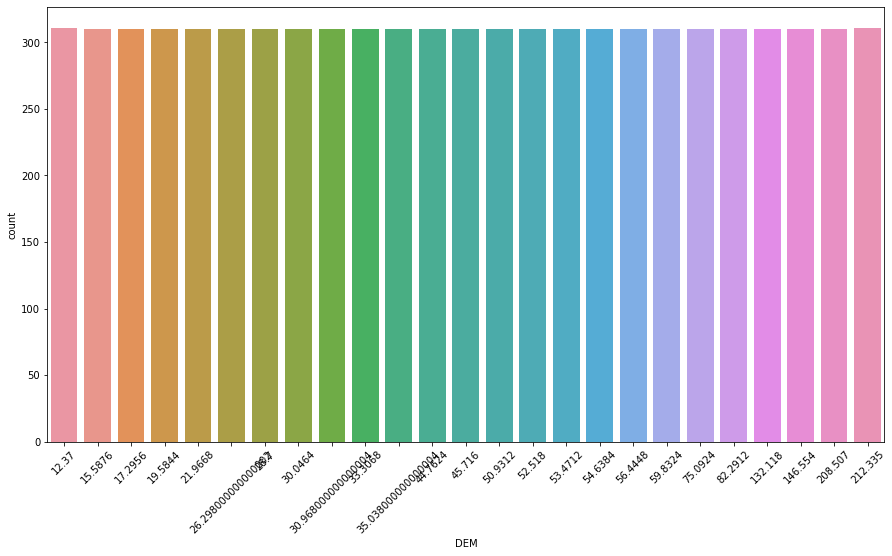

In [276]:
#Dem count which value repeated 
plt.figure(figsize=(15,8))
sns.countplot(x='DEM',data=temp)
plt.xticks(rotation=45)
temp['DEM'].value_counts()

0.697000    310
0.266100    310
0.623300    310
2.785000    310
0.572100    310
0.098500    310
0.412500    310
2.686500    310
0.222300    310
0.155400    310
0.514100    310
5.178200    310
2.534800    310
0.855200    310
2.257900    310
0.133200    310
1.231300    310
1.562900    310
0.593100    310
0.505500    310
0.271300    310
0.145700    310
0.618000    310
1.767800    310
4.729600    310
0.098475      1
5.178230      1
Name: Slope, dtype: int64

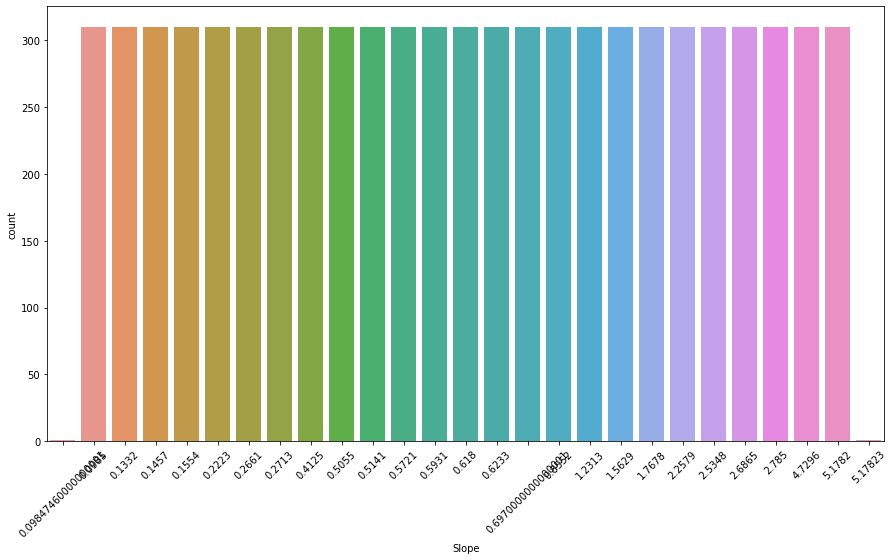

In [277]:
#Slop count which value repeated 
plt.figure(figsize=(15,8))
sns.countplot(x='Slope',data=temp)
plt.xticks(rotation=45)
temp['Slope'].value_counts()

every value have 310 count except 2 value i.e. 0.098475   & 5.178230 both have only 1 count

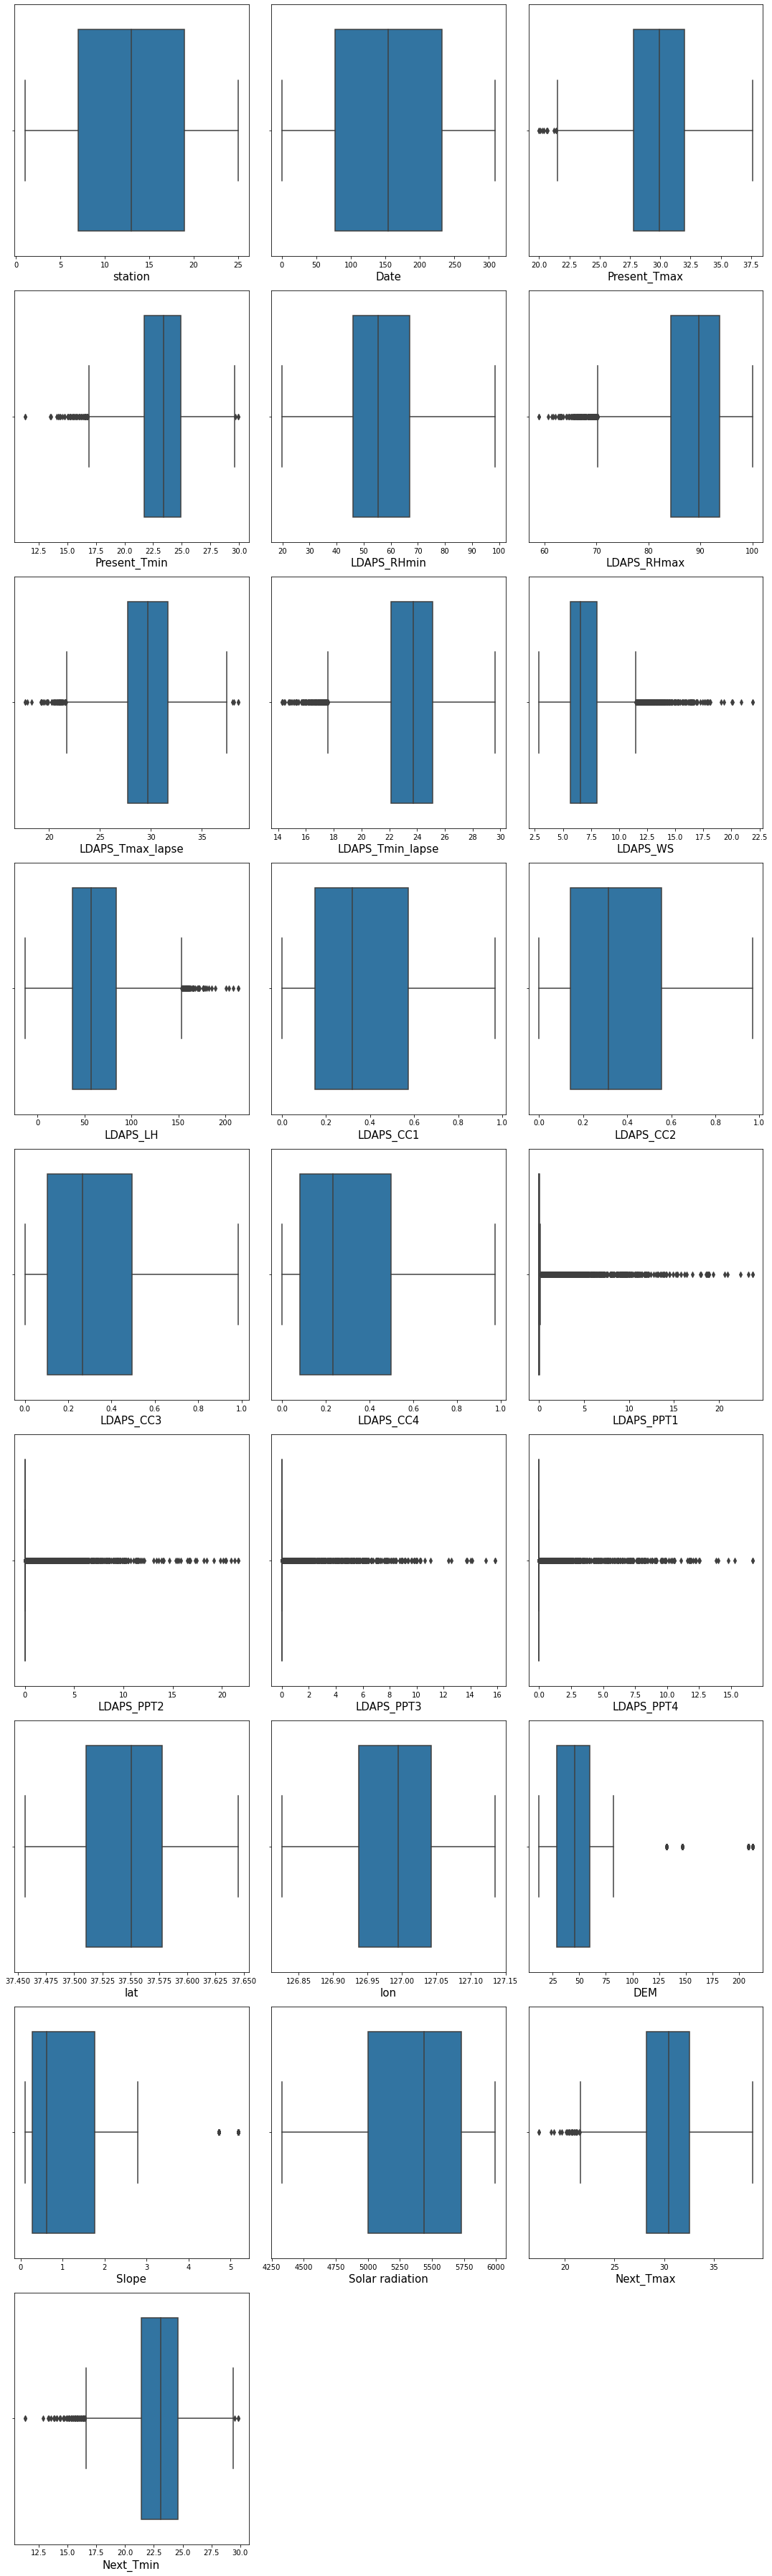

In [278]:
#Visualize the outliers using boxplot
plt.figure(figsize=(15,50))
graph=1
for column in temp:
    if graph<=25:
        ax=plt.subplot(9,3,graph)
        ax=sns.boxplot(temp[column],orient="v")
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.tight_layout() 

# Eliminate Outliers 

In [279]:
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(temp))
z

array([[1.66329184, 1.51421425, 0.36132577, ..., 1.51793488, 0.37628214,
        0.6975993 ],
       [1.52464842, 1.51421425, 0.72108401, ..., 1.22994952, 0.07209725,
        0.17406357],
       [1.38600499, 1.51421425, 0.61960809, ..., 1.21653443, 0.26425985,
        0.38974413],
       ...,
       [1.66415031, 1.67061842, 2.22171758, ..., 2.0743251 , 0.79263444,
        2.2279345 ],
       [1.66329184, 1.72558643, 3.30412736, ..., 2.35821196, 4.12345278,
        4.68452522],
       [1.66329184, 1.72558643, 2.64912642, ..., 1.51793488, 2.76237361,
        2.76579089]])

In [280]:
index=np.where(z>3.8)[0] #we use 3.8 to avoid more data loss

In [281]:
#shape of data after removing outliers 
temp=temp.drop(temp.index[index])
temp.shape

(7219, 25)

In [282]:
#calculation of dataloss after removing outliers
dataloss=((7752-7219)/7752)*100
dataloss

6.875644994840041

6.8% data loss from original dataset temp

In [283]:
#check skewness in dataset
temp.skew()

station             0.001860
Date               -0.000990
Present_Tmax       -0.303354
Present_Tmin       -0.343791
LDAPS_RHmin         0.318387
LDAPS_RHmax        -0.798069
LDAPS_Tmax_lapse   -0.183582
LDAPS_Tmin_lapse   -0.538665
LDAPS_WS            1.219080
LDAPS_LH            0.628948
LDAPS_CC1           0.556586
LDAPS_CC2           0.494347
LDAPS_CC3           0.694996
LDAPS_CC4           0.704655
LDAPS_PPT1          3.831242
LDAPS_PPT2          4.687276
LDAPS_PPT3          5.570200
LDAPS_PPT4          6.117247
lat                 0.094043
lon                -0.277141
DEM                 1.736275
Slope               1.581812
Solar radiation    -0.512449
Next_Tmax          -0.317281
Next_Tmin          -0.367097
dtype: float64

Skewness present in dataset lets remove skewness with PowerTransformer method

In [284]:
#removing skewness with PowerTrasform
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
print(pt.fit(temp))

PowerTransformer()


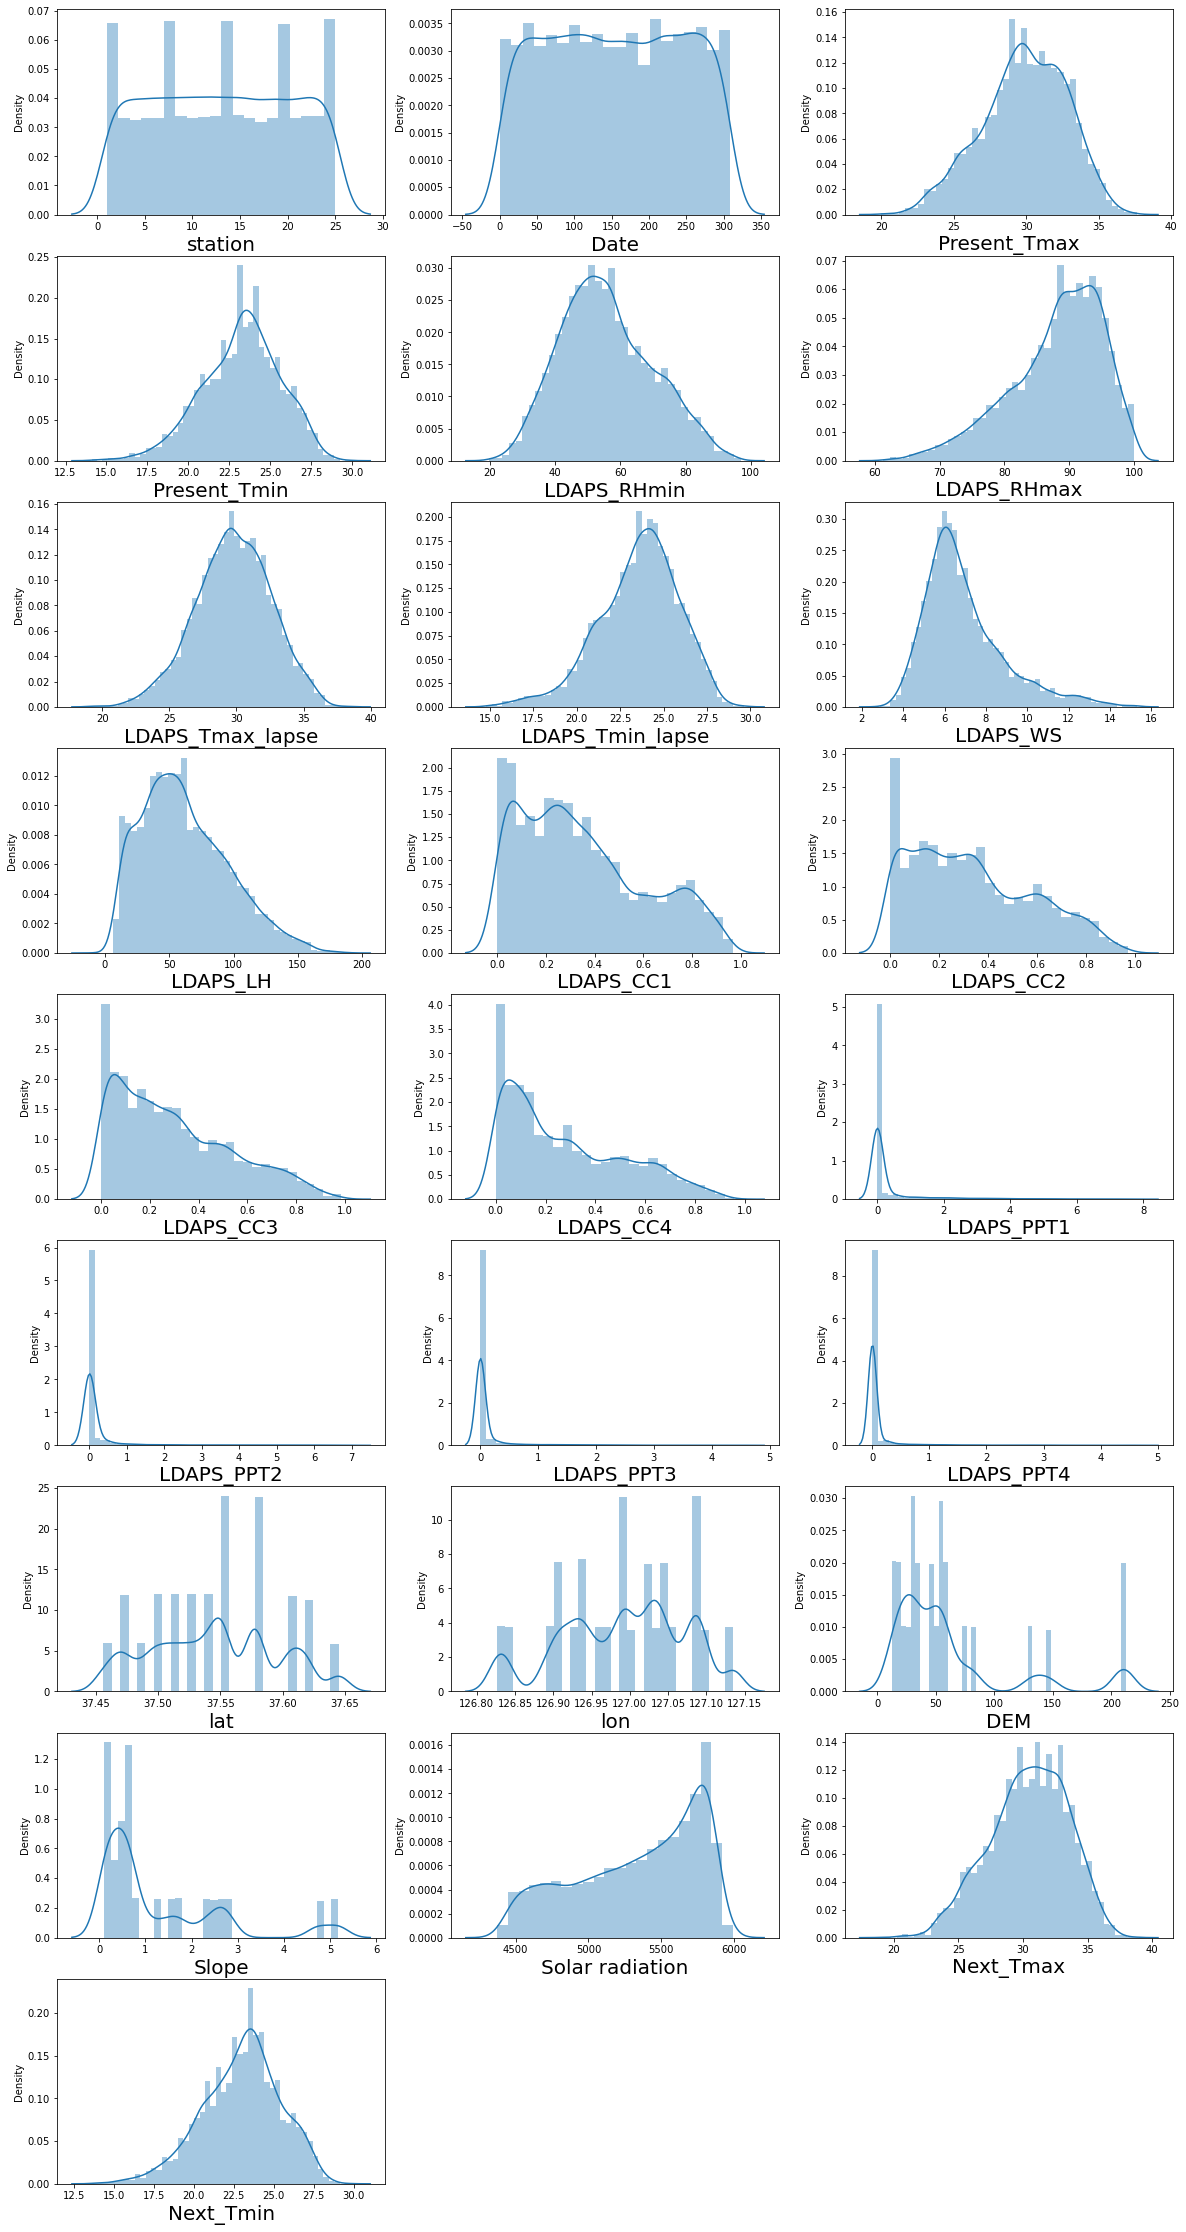

In [285]:
#visualization after removing outliers with plot data distribution 
plt.figure(figsize=(20,40))
plotnumber=1
for column in temp:
    if plotnumber<=25:
        ax=plt.subplot(9,3,plotnumber)
        sns.distplot(temp[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show() 

data distribution is better now after removing skewness and outliers 

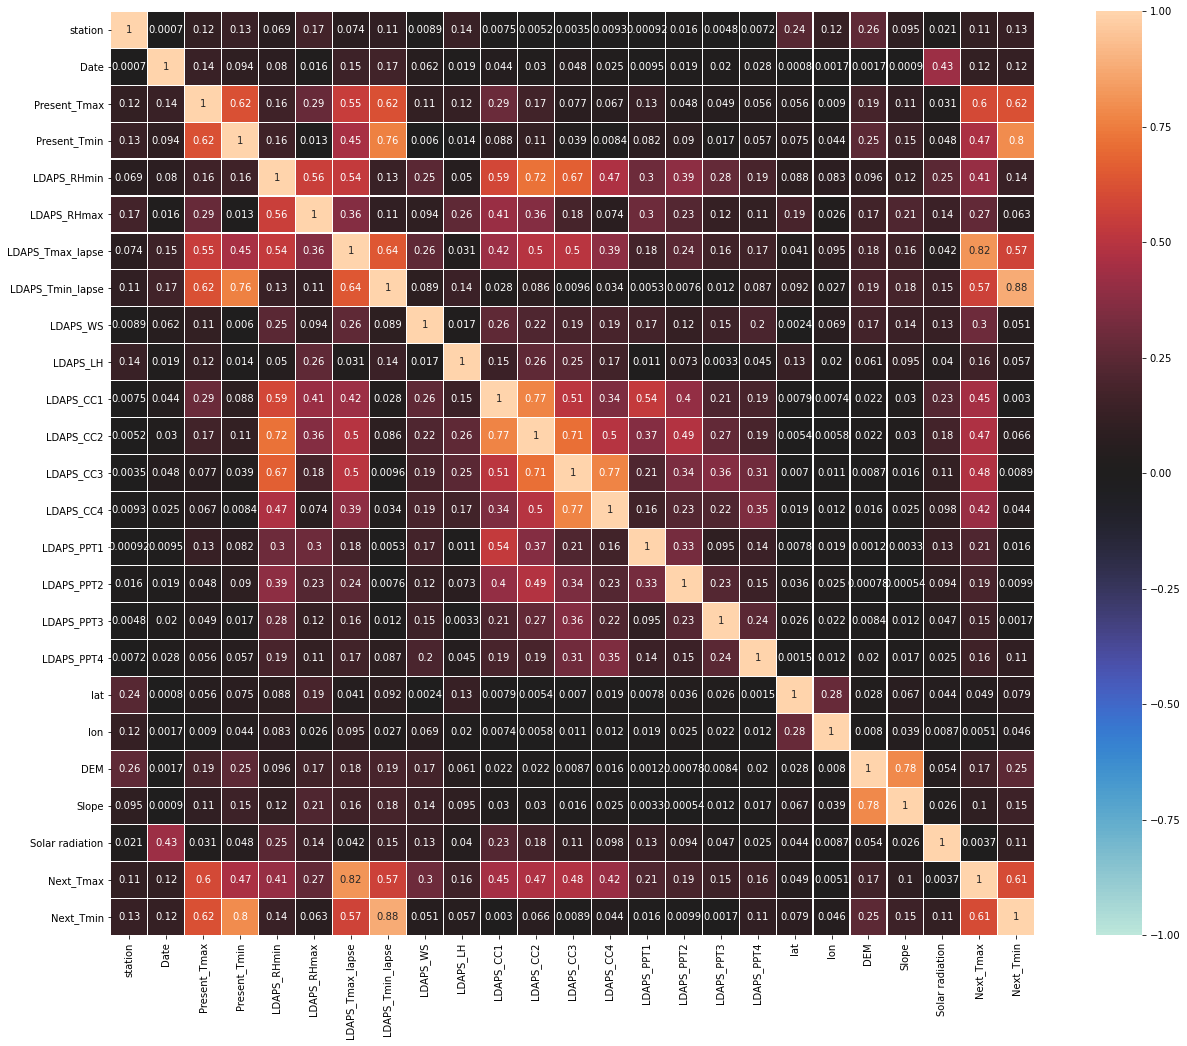

In [286]:
#lets see Plotting Heatmap(Correlation matrix) to check multicollinearity
df_corr=temp.corr().abs()
plt.figure(figsize=(22,17))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.show()

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmin'>

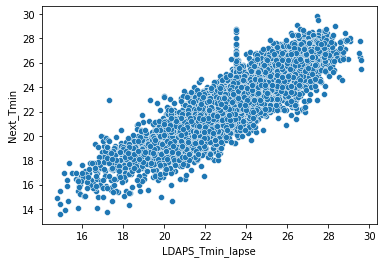

In [287]:
#check multicollineraity between LDAPS_Tmin_lapse and Next_tmin as it have highest number in heatmap
sns.scatterplot(x='LDAPS_Tmin_lapse',y='Next_Tmin',data=temp)

Positive correlation between LDAPS_Tmin_lapse and Next_Tmin(target variable)

<AxesSubplot:xlabel='Next_Tmin', ylabel='Present_Tmin'>

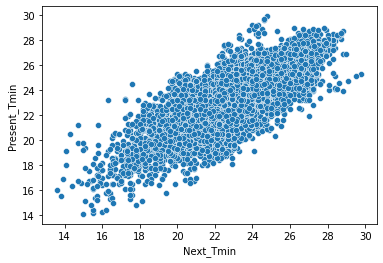

In [288]:
#next_tmin and Present_tmin multicollinearity check with scatter plot
sns.scatterplot(x='Next_Tmin',y='Present_Tmin',data=temp)

positive linear relationship with features and target variable Next_Tmin

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='LDAPS_CC4'>

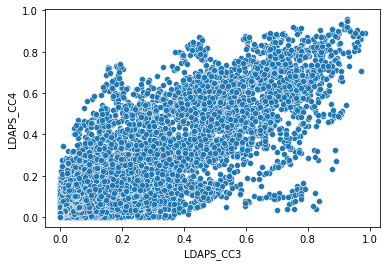

In [289]:
#LDAPS_CC3 and LDAPS_CC4 multicollinearity check with scatter plot
sns.scatterplot(x='LDAPS_CC3',y='LDAPS_CC4',data=temp)

weak correlation between LDAPS_CC3 LDAPS_CC4

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='LDAPS_RHmin'>

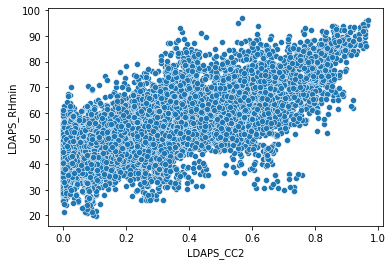

In [290]:
#LDAPS_CC2 and LDAPS_RHmin multicollinearity check with scatter plot
sns.scatterplot(x='LDAPS_CC2',y='LDAPS_RHmin',data=temp)

weak Linear relationship 

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='LDAPS_CC2'>

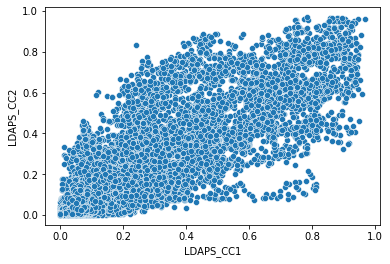

In [291]:
#LDAPS_CC1 and LDAPS_CC2 multicollinearity check with scatter plot
sns.scatterplot(x='LDAPS_CC1',y='LDAPS_CC2',data=temp)

weak Linear relationship 

<AxesSubplot:xlabel='DEM', ylabel='Slope'>

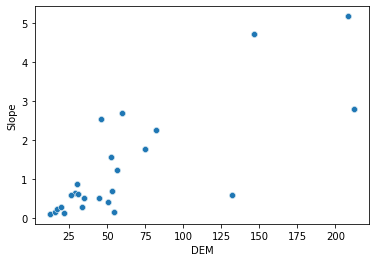

In [292]:
#DEM and slope multicollinearity check with scatter plot
sns.scatterplot(x='DEM',y='Slope',data=temp)

Weak positive corrleation between DEM and Slope

In [293]:
corr_matrix=temp.corr()
corr_matrix['station'].sort_values(ascending=False)

station             1.000000
Present_Tmin        0.132832
Next_Tmin           0.131481
Present_Tmax        0.115259
Next_Tmax           0.110997
LDAPS_Tmin_lapse    0.108218
LDAPS_Tmax_lapse    0.073544
LDAPS_CC4           0.009305
LDAPS_WS            0.008901
LDAPS_CC1           0.007504
LDAPS_PPT4          0.007207
LDAPS_CC2           0.005212
LDAPS_CC3           0.003453
Date                0.000697
LDAPS_PPT1         -0.000920
LDAPS_PPT3         -0.004784
LDAPS_PPT2         -0.015784
Solar radiation    -0.020776
LDAPS_RHmin        -0.069277
Slope              -0.095393
lon                -0.120581
LDAPS_LH           -0.138743
LDAPS_RHmax        -0.172092
lat                -0.240043
DEM                -0.260060
Name: station, dtype: float64

In [294]:
#seprating dependent and independent variable target variable is two Ymax and Ymin

Ymax=temp.Next_Tmax
Ymin=temp.Next_Tmin
X=temp.drop(columns=['Next_Tmax','Next_Tmin'],axis=1)

In [295]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [296]:
pca=PCA()   #PCA reduce features demensiality reduction technique convert features in some component,when its apply mean is0
pca.fit_transform(X_scaled)  #features selection by screep graph and plot

array([[-6.96478665e-02,  2.70285753e+00, -2.33369001e+00, ...,
        -1.76546185e-01,  6.69895968e-03,  2.49123142e-01],
       [-9.92837399e-01,  4.98778320e-01, -5.34932992e-01, ...,
        -3.38397096e-01,  3.25272712e-03,  2.71518973e-01],
       [-1.23818201e+00, -2.88037220e-01,  1.57415231e-01, ...,
        -1.72223157e-01,  1.93916083e-02,  3.27862204e-01],
       ...,
       [-2.30797938e+00,  3.87786502e+00,  3.95577059e+00, ...,
         3.68417377e-01,  2.07575840e-01,  6.05506121e-01],
       [-2.44380403e+00,  3.60787368e+00,  4.19032114e+00, ...,
         3.98426850e-01,  1.86058483e-01,  4.70851708e-01],
       [-2.43259947e+00,  3.54424822e+00,  4.36977996e+00, ...,
         2.79789516e-01,  8.33785743e-02,  2.12131954e-01]])

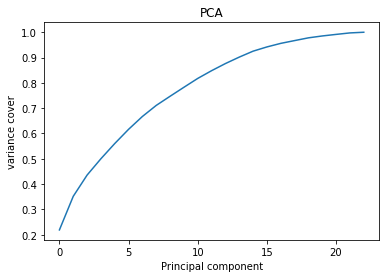

In [297]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal component')
plt.ylabel('variance cover')        #this screep plot give idea to selct top 95% faetures only
plt.title('PCA')
plt.show()

so we need all features as per screep plot 

In [298]:
#train test split data set Ymax and Ymin seprately as two target vairables 
Xmax_train,Xmax_test,Ymax_train,Ymax_test=train_test_split(X_scaled,Ymax,test_size=.25,random_state=100)

In [299]:
Xmin_train,Xmin_test,Ymin_train,Ymin_test=train_test_split(X_scaled,Ymin,test_size=.25,random_state=12)

# Linear Regression Model

In [300]:
from sklearn.linear_model import LinearRegression

In [351]:
#invoke Linear regression and fit with Yamx and Ymin 
Lr=LinearRegression()
Lr.fit(Xmax_train,Ymax_train)

LinearRegression()

In [352]:
Ymax_pred=Lr.predict(Xmax_test)

In [353]:
#train model score max 
Lr.score(Xmax_train,Ymax_train)

0.7498402314557432

Linear Model score with Ymax data 74 %

In [354]:
#train model with Ymin dataset
Lr=LinearRegression()
Lr.fit(Xmin_train,Ymin_train)

LinearRegression()

In [355]:
Lr.score(Xmin_train,Ymin_train)

0.82704234963603

Linear model score for Ymin is 82%

In [356]:
#cross validation of model
from sklearn.model_selection import cross_val_score

In [308]:
#Ymax data cross validation
cross_val_score(Lr,X_scaled,Ymax,cv=5).mean()

0.6852423858174828

In [357]:
#Ymax data cross validation
cross_val_score(Lr,X_scaled,Ymin,cv=5).mean()

0.7758602590428214

In [358]:
#score is low so lets do regulrization of model with lasso 
from sklearn.linear_model import Lasso,LassoCV

In [359]:
#for Ymax
lassocv=LassoCV(alphas=[.01,.1,.2,.7,.5,.3], max_iter=100,normalize=True)
lassocv.fit(Xmax_train,Ymax_train)  

LassoCV(alphas=[0.01, 0.1, 0.2, 0.7, 0.5, 0.3], max_iter=100, normalize=True)

In [360]:
#for Ymin
lassocv=LassoCV(alphas=[.01,.1,.2,.7,.5,.3], max_iter=100,normalize=True)
lassocv.fit(Xmin_train,Ymin_train)  

LassoCV(alphas=[0.01, 0.1, 0.2, 0.7, 0.5, 0.3], max_iter=100, normalize=True)

In [361]:
alpha=lassocv.alpha_
alpha

0.01

In [362]:
#now with Lasso regression lets see how our data is fitted for Ymax
lasso_reg=Lasso(alpha=alpha)
lasso_reg.fit(Xmax_train,Ymax_train)

Lasso(alpha=0.01)

In [363]:
#Ymax data score
lasso_reg.score(Xmax_train,Ymax_train)

0.7495044473126349

Not much improvement score remain same

In [364]:
#now with Lasso regression lets see how our data is fitted for Ymin
lasso_reg=Lasso(alpha=alpha)
lasso_reg.fit(Xmin_train,Ymin_train)

Lasso(alpha=0.01)

In [365]:
#now with Lasso regression lets see how our data is fitted for Ymin
lasso_reg=Lasso(alpha=alpha)
lasso_reg.fit(Xmin_train,Ymin_train)

Lasso(alpha=0.01)

In [366]:
#Ymin data score
lasso_reg.score(Xmin_train,Ymin_train)

0.8262861923478043

In [367]:
cross_val_score(Lr,X_scaled,Ymax,cv=5).mean()

0.6852423858174828

# RandomForestRegression Model

In [319]:
from sklearn.ensemble import RandomForestRegressor

In [345]:
#train with Max data set
rfr=RandomForestRegressor()
rfr.fit(Xmax_train,Ymax_train)

RandomForestRegressor()

In [346]:
Ymax_pred=rfr.predict(Xmax_test)

In [347]:
rfr.score(Xmax_train,Ymax_train)

0.9853347716706148

In [348]:
#train data model score of Ymax
rfr.fit(Xmin_train,Ymin_train)

RandomForestRegressor()

In [349]:
#Ymin train data model score
rfr.score(Xmin_train,Ymin_train)

0.9855717753635073

In [350]:
Ymin_pred=rfr.predict(Xmin_test)

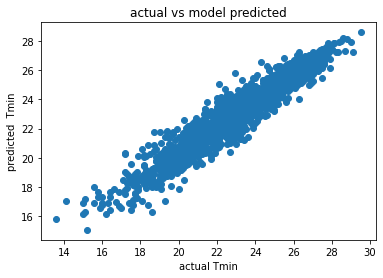

In [334]:
#scatter plot to see predict vs test data
plt.scatter(Ymin_test,Ymin_pred)
plt.xlabel('actual Tmin')
plt.ylabel('predicted  Tmin')
plt.title('actual vs model predicted')
plt.show()

In [335]:
#print r2_score
print(r2_score(Ymin_test,Ymin_pred))

0.9045246723820216


Cross validation of model

In [336]:
cross_val_score(rfr,X_scaled,Ymax,cv=5).mean()

0.6767036489910776

In [337]:
cross_val_score(rfr,X_scaled,Ymin,cv=5).mean()

0.7761655417450982

Model score is .98 and cross validation score is .77 means model is overfitting issue ,need hyper parameter Tuning

HyperParameter Tuning

In [338]:
from sklearn.model_selection import RandomizedSearchCV

In [339]:
param_grid={'n_estimators':[100,130,150,170,180,200],
            'max_features':['auto','sqrt'],
            'max_depth':[5,8,10,12,14,16,18],
            'min_samples_split':[2,4,5,7,8,10,12],
            'min_samples_leaf':[1,2,4,6,10]}

In [340]:
grid_search=RandomizedSearchCV(rfr,param_distributions=param_grid,cv=5)

In [341]:
grid_search.fit(Xmax_train,Ymax_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 8, 10, 12, 14, 16, 18],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 10],
                                        'min_samples_split': [2, 4, 5, 7, 8, 10,
                                                              12],
                                        'n_estimators': [100, 130, 150, 170,
                                                         180, 200]})

In [342]:
#find best parameters
grid_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 14}

In [343]:
#tune Ymax model with best parameters
rfr=RandomForestRegressor(n_estimators=200,min_samples_split=12,min_samples_leaf=1,max_features='auto',max_depth=14)
rfr.fit(Xmax_train,Ymax_train)

RandomForestRegressor(max_depth=14, min_samples_split=12, n_estimators=200)

In [344]:
#train data score post tuning
rfr.score(Xmax_train,Ymax_train)

0.9599840248991387

Score much improved for  Next Tmax now

In [187]:
Ymax_pred=rfr.predict(Xmax_test)

In [188]:
print('**** accuracy of Ymax post tuning****')
print(r2_score(Ymax_test,Ymax_pred))

**** accuracy of Ymax post tuning****
0.9009324401144296


In [190]:
#mean absolute error and mean_squared_error
print('MAE: ',mean_absolute_error(Ymax_test,Ymax_pred))
print('MSE: ',mean_squared_error(Ymax_test,Ymax_pred))

MAE:  0.7142014431988999
MSE:  0.9206866218731222


In [191]:
#Cross validation post tuning
cross_val_score(rfr,X_scaled,Ymax,cv=5).mean()

0.6755911448145178

so my model score accuracy is 67% actually accurate as per cross validation for Ymax next day temprature

In [192]:
#tune Ymin  model with best parameters
rfr=RandomForestRegressor(n_estimators=200,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=18)
rfr.fit(Xmin_train,Ymin_train)

RandomForestRegressor(max_depth=18, n_estimators=200)

In [193]:
#test data score post tuning
rfr.score(Xmin_test,Ymin_test)

0.9034031149794406

Post tuning train and test score improved 

In [196]:
Ymin_pred=rfr.predict(Xmin_test)

In [197]:
print('**** accuracy of Ymin post tuning****')
print(r2_score(Ymin_test,Ymin_pred))

**** accuracy of Ymin post tuning****
0.9034031149794406


In [199]:
#mean absolute error and mean_squared_error
print('MAE: ',mean_absolute_error(Ymin_test,Ymin_pred))
print('MSE: ',mean_squared_error(Ymin_test,Ymin_pred))

MAE:  0.5984132405085008
MSE:  0.6052467580668177


In [200]:
#Cross validation post tuning of Ymin
cross_val_score(rfr,X_scaled,Ymin,cv=5).mean()

0.7773276697956725

score and cv score not significant close but slightly improved post tuning 

# KNN Regression model

In [201]:
from sklearn.neighbors import KNeighborsRegressor

In [202]:
#train modle with Ymax data
knn=KNeighborsRegressor()
knn.fit(Xmax_train,Ymax_train)

KNeighborsRegressor()

In [203]:
Ymax_pred=knn.predict(Xmax_test)

In [204]:
#Train data model score of Ymax
knn.score(Xmax_train,Ymax_train)

0.8866958992004509

In [205]:
#r2 score
print(r2_score(Ymax_test,Ymax_pred))

0.8348869365688278


In [207]:
#cross validation of knn model
cross_val_score(knn,X_scaled,Ymax,cv=5).mean()

0.5587335366915231

model is overfitting as cross validation score is less wrt model score,need hyperparameter tuning

In [368]:
#train model with Ymin data
knn=KNeighborsRegressor()
knn.fit(Xmin_train,Ymin_train)

KNeighborsRegressor()

In [369]:
Ymin_pred=knn.predict(Xmin_test)

In [370]:
#Train data model score of Ymin
knn.score(Xmin_train,Ymin_train)

0.9095115663559985

In [211]:
#r2 score
print(r2_score(Ymin_test,Ymin_pred))

0.8616879487021324


In [212]:
#cross validation of knn model
cross_val_score(knn,X_scaled,Ymin,cv=5).mean()

0.6337321839397864

cross val score and model score have diffrence overfitting issue

Hyperparameter Tuning of knn model

In [213]:
param_grid={'n_neighbors':[5,7,9,11,13,15],
    'weights':['uniform'],
    'algorithm':['auto'],
    'leaf_size':[10,12,15,20,30],
    'p':[2,4,6,8,10]
    
}

In [214]:
grid_search=RandomizedSearchCV(knn,param_distributions=param_grid,cv=5)

In [215]:
grid_search.fit(Xmax_train,Ymax_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'algorithm': ['auto'],
                                        'leaf_size': [10, 12, 15, 20, 30],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'p': [2, 4, 6, 8, 10],
                                        'weights': ['uniform']})

In [216]:
grid_search.best_params_

{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 13,
 'leaf_size': 20,
 'algorithm': 'auto'}

In [217]:
#tune KNN with best parameters 
knn=KNeighborsRegressor(n_neighbors=13,weights='uniform',p=2,leaf_size=20,algorithm='auto')

In [218]:
#fit model with Ymax data
knn.fit(Xmax_train,Ymax_train)

KNeighborsRegressor(leaf_size=20, n_neighbors=13)

In [221]:
#predict target variable
Ymax_pred=knn.predict(Xmax_test)

In [222]:
#post tuning model score
knn.score(Xmax_train,Ymax_train)

0.839996418635335

In [223]:
print('**** accuracy of Ymax post tuning****')
print(r2_score(Ymax_test,Ymax_pred))

**** accuracy of Ymax post tuning****
0.8290114677645057


In [224]:
#mean absolute error and mean_squared_error
print('MAE: ',mean_absolute_error(Ymax_test,Ymax_pred))
print('MSE: ',mean_squared_error(Ymax_test,Ymax_pred))

MAE:  0.9745800376102397
MSE:  1.5890858148194962


In [225]:
#cross validation of KNN model
cross_val_score(knn,X_scaled,Ymax,cv=5).mean()

0.5846505327168824

model score and cross validation score improved slightly

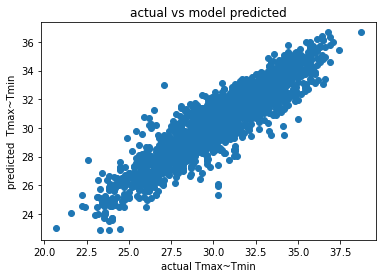

In [226]:
#scatter plot to see predict vs test data
plt.scatter(Ymax_test,Ymax_pred)
plt.xlabel('actual Tmax')
plt.ylabel('predicted  Tmax')
plt.title('actual vs model predicted')
plt.show()

# DecesionTree Model

In [227]:
from sklearn.tree import DecisionTreeRegressor

In [228]:
# train Ymax data
dt=DecisionTreeRegressor()
dt.fit(Xmax_train,Ymax_train)

DecisionTreeRegressor()

In [229]:
Ymax_pred=dt.predict(Xmax_test)

In [230]:
#model score of Ymax
dt.score(Xmax_train,Ymax_train)

1.0

In [231]:
#print r2_score
print(r2_score(Ymax_test,Ymax_pred))

0.7780439535775593


In [232]:
#cross validation of DecesionTreeRegression model
cross_val_score(dt,X_scaled,Ymax,cv=5).mean()

0.3971685700116846

cross validation score is low modeil score is 1 overfitting problem need to address 

In [371]:
# train Ymin data
dt=DecisionTreeRegressor()
dt.fit(Xmin_train,Ymin_train)

DecisionTreeRegressor()

In [372]:
Ymin_pred=dt.predict(Xmin_test)

In [373]:
#model score of Ymax
dt.score(Xmin_train,Ymin_train)

1.0

In [374]:
#print r2_score
print(r2_score(Ymax_test,Ymax_pred))

0.7802176026074991


In [375]:
#cross validation of DecesionTreeRegression model
cross_val_score(dt,X_scaled,Ymin,cv=5).mean()

0.5587528420941801

cross val score is low lets do hyperparameter tuning

Hyperparameter Tuning of DecesionTree Model

In [376]:
parametrs={'criterion':['mse'],
    'max_depth':range(1,18,2),
    'min_samples_split':range(2,16, 2),
    'min_samples_leaf':range(1,10,1),
    'min_weight_fraction_leaf':[0.01,0.02,0.1,.3,.7,1]}

In [239]:
#RandomizesearchCV 
grid_search=RandomizedSearchCV(estimator=dt,param_distributions=parametrs,cv=5)

In [240]:
#fit new parameters with Xmax training data
grid_search.fit(Xmax_train,Ymax_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['mse'],
                                        'max_depth': range(1, 18, 2),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 16, 2),
                                        'min_weight_fraction_leaf': [0.01, 0.02,
                                                                     0.1, 0.3,
                                                                     0.7, 1]})

In [241]:
grid_search.best_params_

{'min_weight_fraction_leaf': 0.01,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_depth': 9,
 'criterion': 'mse'}

In [242]:
#model initiate with new parameters
dt=DecisionTreeRegressor(criterion='mse',min_weight_fraction_leaf=.01,min_samples_leaf=3,min_samples_split=4,max_depth=9)

In [243]:
#fit model to training dataset
dt.fit(Xmax_train,Ymax_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=4,
                      min_weight_fraction_leaf=0.01)

In [244]:
#predicted 
Ymax_pred=dt.predict(Xmax_test)

In [245]:
#model score
dt.score(Xmax_train,Ymax_train)

0.7832217242033253

In [246]:
#print r2_score post tuning of model
print(r2_score(Ymax_test,Ymax_pred))

0.7786109229777441


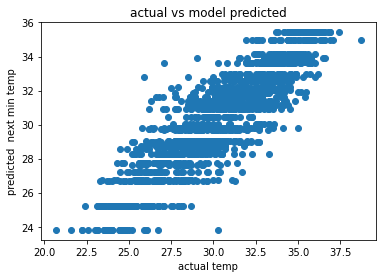

In [258]:
#scatter plot to see predict vs test data
plt.scatter(Ymax_test,Ymax_pred)
plt.xlabel('actual temp')
plt.ylabel('predicted  next min temp')
plt.title('actual vs model predicted')
plt.show()

In [377]:
#fit new parameters with Ymin training data
grid_search.fit(Xmin_train,Ymin_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 8, 10, 12, 14, 16, 18],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 10],
                                        'min_samples_split': [2, 4, 5, 7, 8, 10,
                                                              12],
                                        'n_estimators': [100, 130, 150, 170,
                                                         180, 200]})

In [378]:
grid_search.best_params_

{'n_estimators': 180,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 14}

In [250]:
#model initiate with new parameters
dt=DecisionTreeRegressor(criterion='mse',min_weight_fraction_leaf=.02,min_samples_leaf=2,min_samples_split=2,max_depth=11)

In [253]:
#fit model to Ymax training dataset
dt.fit(Xmin_train,Ymin_train)

DecisionTreeRegressor(max_depth=11, min_samples_leaf=2,
                      min_weight_fraction_leaf=0.02)

In [254]:
#predicted 
Ymin_pred=dt.predict(Xmin_test)

In [255]:
#model score
dt.score(Xmin_train,Ymin_train)

0.8146186771729451

In [256]:
#print r2_score post tuning of model
print(r2_score(Ymin_test,Ymin_pred))

0.8067786911339786


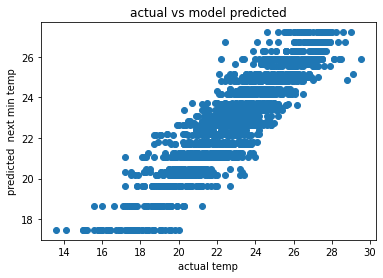

In [257]:
#scatter plot to see predict vs test data
plt.scatter(Ymin_test,Ymin_pred)
plt.xlabel('actual temp')
plt.ylabel('predicted  next min temp')
plt.title('actual vs model predicted')
plt.show()

# GradientBoosting Model

In [390]:
from sklearn.ensemble import GradientBoostingRegressor

In [391]:
#train model with Ymax data
gbr=GradientBoostingRegressor()
gbr.fit(Xmax_train,Ymax_train)

GradientBoostingRegressor()

In [393]:
Ymax_pred=gbr.predict(Xmax_test)

In [394]:
#model score of Ymax
gbr.score(Xmax_train,Ymax_train)

0.8726506795766189

In [395]:
#print r2_score 
print(r2_score(Ymax_test,Ymax_pred))

0.8653860050329105


In [396]:
#cross validation of Ymax
cross_val_score(gbr,X_scaled,Ymax,cv=5).mean()

0.6958989438557245

In [397]:
#train model with Ymin data
gbr=GradientBoostingRegressor()
gbr.fit(Xmin_train,Ymin_train)

GradientBoostingRegressor()

In [398]:
Ymin_pred=gbr.predict(Xmin_test)

In [399]:
#model score of Ymin
gbr.score(Xmin_train,Ymin_train)

0.9061110202072941

In [400]:
#print r2_score
print(r2_score(Ymin_test,Ymin_pred))

0.8890667929199099


In [401]:
#cross validation of Ymax
cross_val_score(gbr,X_scaled,Ymin,cv=5).mean()

0.7852095875391474

HyperParameter Tuning of GradientBoosting Model

In [453]:
param={'loss':['ls'],
    'learning_rate':[0.02,0.1,0.3,0.4,0.9],
    'n_estimators':[100,150,200,250]}

In [454]:
grid_search=RandomizedSearchCV(gbr,param_distributions=param, cv=5,n_jobs=-1)

In [455]:
grid_search.fit(Xmax_train,Ymax_train)

RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingRegressor(learning_rate=0.4,
                                                       n_estimators=250),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.02, 0.1, 0.3, 0.4,
                                                          0.9],
                                        'loss': ['ls'],
                                        'n_estimators': [100, 150, 200, 250]})

In [456]:
grid_search.best_params_

{'n_estimators': 250, 'loss': 'ls', 'learning_rate': 0.4}

In [457]:
gbr=GradientBoostingRegressor(n_estimators=250,loss='ls',learning_rate=0.04)

In [458]:
#model tuning with best parameters
gbr.fit(Xmax_train,Ymax_train)

GradientBoostingRegressor(learning_rate=0.04, n_estimators=250)

In [459]:
Ymax_pred=gbr.predict(Xmax_test)

In [460]:
gbr.score(Xmax_train,Ymax_train)

0.8703924717271012

In [461]:
#print r2_score 
print(r2_score(Ymax_test,Ymax_pred))

0.8642661002916074


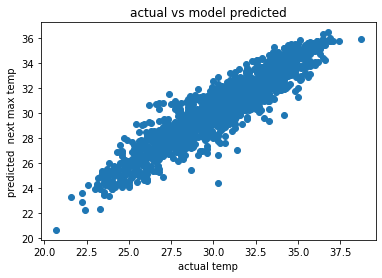

In [462]:
#scatter plot to see predict vs test data
plt.scatter(Ymax_test,Ymax_pred)
plt.xlabel('actual temp')
plt.ylabel('predicted  next max temp')
plt.title('actual vs model predicted')
plt.show()

In [463]:
#mean absolute error and mean_squared_error
print('MAE: ',mean_absolute_error(Ymax_test,Ymax_pred))
print('MSE: ',mean_squared_error(Ymax_test,Ymax_pred))

MAE:  0.8715319643748534
MSE:  1.2614460852829326


In [464]:
#post tuning Ymax cross validation
cross_val_score(gbr,X_scaled,Ymax,cv=5).mean()

0.6949463129303123

In [442]:
#model tuning with best parameters of Ymin
grid_search.fit(Xmin_train,Ymin_train)

RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingRegressor(learning_rate=0.02,
                                                       max_depth=9,
                                                       min_impurity_split=2,
                                                       subsample=1),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.02, 0.1, 0.3, 0.4,
                                                          0.9],
                                        'loss': ['ls'],
                                        'n_estimators': [100, 150, 200, 250]})

In [443]:
grid_search.best_params_

{'n_estimators': 250, 'loss': 'ls', 'learning_rate': 0.4}

In [444]:
gbr=GradientBoostingRegressor(n_estimators=250,loss='ls',learning_rate=0.4)

In [445]:
#model tuning with best parameters for Ymin
gbr.fit(Xmin_train,Ymin_train)

GradientBoostingRegressor(learning_rate=0.4, n_estimators=250)

In [446]:
Ymin_pred=gbr.predict(Xmin_test)

In [447]:
#model  Score for Ymin
gbr.score(Xmin_train,Ymin_train)

0.9791488843367866

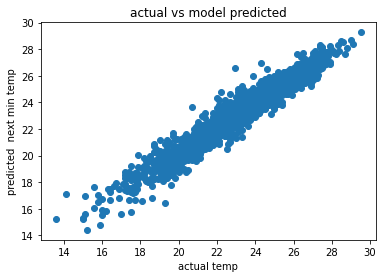

In [448]:
#scatter plot to see predict vs test data
plt.scatter(Ymin_test,Ymin_pred)
plt.xlabel('actual temp')
plt.ylabel('predicted  next min temp')
plt.title('actual vs model predicted')
plt.show()

In [449]:
#post tuning Ymin cross validation
cross_val_score(gbr,X_scaled,Ymin,cv=5).mean()

0.7500224163337318

In [451]:
#mean absolute error and mean_squared_error for Ymin
print('MAE: ',mean_absolute_error(Ymin_test,Ymin_pred))
print('MSE: ',mean_squared_error(Ymin_test,Ymin_pred))

MAE:  0.4944104701104299
MSE:  0.41816786886124274


In [465]:
#saving model Gradient Boost regression
import pickle
filename='finalized_model.pickel'
pickle.dump(gbr, open(filename,'wb'))